PRACTICA 6 HECHA POR HÉCTOR TORIBIO GONZÁLEZ

In [15]:
from pynini import *

AUTOMATA R

FUNCION QUE NO INTRODUCE LOS SIMBOLOS QUE LE PASEMOS COMO PARAMETRO EN LA TABLA DE SIMBOLOS

In [16]:

def symbol_table(letras):
    alfabeto = list(letras)
    st = SymbolTable()
    st.add_symbol("ε", 0)
    for symb in alfabeto:
        st.add_symbol(symb, ord(symb))
    return st

EMPEZAREMOS POR EL AUTOMATA DE RISA. AÑADIMOS LOS ESTADOS QUE VAMOS A NECESITAR Y DESPUES INDICAMOS LOS ESTADOS QUE VAN A IR LLEGANDO SEGUN LO QUE CONTENGA LA CADENA DE ENTRADA

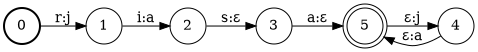

In [17]:

fst = Fst()
sym = symbol_table('jarisa')
s0 = fst.add_state()
s1 = fst.add_state()
s2 = fst.add_state()
s3 = fst.add_state()
s4 = fst.add_state()
s5 = fst.add_state()
fst.add_arc( s0, Arc( ord('r'), ord('j'), 0, s1) )
fst.add_arc( s1, Arc( ord('i'), ord('a'), 0, s2) )
fst.add_arc( s2, Arc( ord('s'), 0, 0, s3) )
fst.add_arc( s3, Arc( ord('a'), 0, 0, s5) )
fst.add_arc( s5, Arc( 0, ord('j'), 0, s4) )
fst.add_arc( s4, Arc( 0, ord('a'), 0, s5) )
fst.set_start( s0 )
fst.set_final( s5 )
fst.set_input_symbols(sym)
fst.set_output_symbols(sym)

PROBAMOS EL AUTOMATA CON LA CADENA DE ENTRADA "RISA"

In [18]:
fstprueba = "risa" @ fst
list(shortestpath(fstprueba, nshortest=20).paths().ostrings())

['jajajaja',
 'jajajajajajaja',
 'jajajajajajajaja',
 'jajajajajajajajajajajajajajajajajaja',
 'jajajajajajajajajajajajajajajajajajajaja',
 'jajajajajajajajajaja',
 'jajajajajaja',
 'jajajajajajajajajajajajaja',
 'jajajajajajajajajajajaja',
 'jajajajaja',
 'jajajajajajajajajajaja',
 'ja',
 'jajajajajajajajajajajajajajaja',
 'jajajajajajajajajajajajajajajajajajaja',
 'jajajajajajajajajajajajajajajaja',
 'jaja',
 'jajajajajajajajajajajajajaja',
 'jajajajajajajajajajajajajajajajaja',
 'jajaja',
 'jajajajajajajajaja']

AUTOMATA C EN EL QUE RODEAREMOS CADA "AB" POR CORCHETES EN LA CADENA DE ENTRADA. HAREMOS MUCHO USO DE LOS EPSILON PARA REALIZAR EL AÑADIDO DE LAS "B" Y LOS "}"

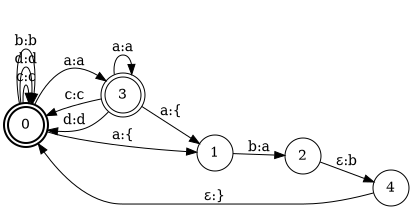

In [19]:
fst2 = Fst()
sym2 = symbol_table('abcd{}')
s1_0 = fst2.add_state()
s1_1 = fst2.add_state()
s1_2 = fst2.add_state()
s1_0_1 = fst2.add_state()
s1_3 = fst2.add_state()
fst2.add_arc( s1_0, Arc( ord('a'), ord('a'), 0, s1_0_1) )
fst2.add_arc( s1_0, Arc( ord('c'), ord('c'), 0, s1_0) )
fst2.add_arc( s1_0, Arc( ord('d'), ord('d'), 0, s1_0) )
fst2.add_arc( s1_0, Arc( ord('b'), ord('b'), 0, s1_0) )
fst2.add_arc( s1_0, Arc( ord('a'), ord('{'), 0, s1_1) )

fst2.add_arc( s1_0_1, Arc( ord('a'), ord('a'), 0, s1_0_1) )
fst2.add_arc( s1_0_1, Arc( ord('c'), ord('c'), 0, s1_0) )
fst2.add_arc( s1_0_1, Arc( ord('d'), ord('d'), 0, s1_0) )
fst2.add_arc( s1_0_1, Arc( ord('a'), ord('{'), 0, s1_1) )
fst2.add_arc( s1_1, Arc( ord('b'), ord('a'), 0, s1_2) )
fst2.add_arc( s1_2, Arc( 0, ord('b'), 0, s1_3) )
fst2.add_arc( s1_3, Arc( 0, ord('}'), 0, s1_0) )

fst2.set_start( s1_0 )
fst2.set_final( s1_0_1 )
fst2.set_final( s1_0 )

fst2.set_input_symbols(sym2)
fst2.set_output_symbols(sym2)

PROBAMOS EL AUTOMATA C

In [26]:
fstprueba2 = "ab" @ fst2
list(shortestpath(fstprueba2, nshortest=15).paths().ostrings())

['{ab}']

AUTOMATA N EN EL QUE INTRODUCIMOS LA COMA DECIMAL EN UN SUPUESTO NUMERO. EN ESTE NUMERO LAS D REPRESENTARAN LOS DIGITOS. 
ESTA IMPLEMENTADA LA UTILIZACION DEL "-".
HAREMOS USO DEL REVERSE PARA PODER LEER LAS CADENAS DEL REVES.

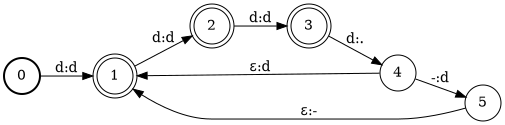

In [21]:
fst3 = Fst()
sym3 = symbol_table('d-.')
st1= fst3.add_state()
st2 = fst3.add_state()
st3= fst3.add_state()
st4 = fst3.add_state()
st5 = fst3.add_state()
st6 = fst3.add_state()

fst3.add_arc( st1, Arc( ord('d'), ord('d'), 0, st2) )
fst3.add_arc( st2, Arc( ord('d'), ord('d'), 0, st3) )
fst3.add_arc( st3, Arc( ord('d'), ord('d'), 0, st4) )
fst3.add_arc( st4, Arc( ord('d'), ord('.'), 0, st5) )
fst3.add_arc( st5, Arc( 0, ord('d'), 0, st2) )
fst3.add_arc( st5, Arc( ord('-'), ord('d'), 0, st6) )
fst3.add_arc( st6, Arc( 0, ord('-'), 0, st2) )

fst3.set_start( st1 )
fst3.set_final( st2 )
fst3.set_final( st3 )
fst3.set_final( st4 )

N = reverse(fst3)

fst3.set_input_symbols(sym3)
fst3.set_output_symbols(sym3)


PRUEBA DEL AUTOMATA N

In [25]:
fstprueba3 = "-dddddddd" @ N
list(shortestpath(fstprueba3, nshortest=15).paths().ostrings())

[]